In [1]:
#from sympy import *
import numpy as np
from numpy import pi
#from sympy import DiracDelta
import itertools
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

In [2]:
i = np.complex(0,1)

Identity = np.mat([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
Gamma0   = np.mat([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])
Gamma1   = np.mat([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0,0]])
Gamma2   = np.mat([[0, 0, 0, -i], [0, 0, i, 0], [0, i, 0, 0], [-i, 0, 0, 0]])
Gamma3   = np.mat([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]])
a = np.dot(Gamma0,Gamma1);b = np.dot(Gamma2,Gamma3)
Gamma5   = i*np.dot(a,b)

CoGamma0 = Gamma0
CoGamma1 = -Gamma1
CoGamma2 = -Gamma2
CoGamma3 = -Gamma3
CoGamma5 = Gamma5

TwoPR = (Identity + Gamma5)
TwoPL = (Identity - Gamma5)

G00PL = np.dot(np.dot(Gamma0,Gamma0),TwoPL)
G01PL = np.dot(np.dot(Gamma0,Gamma1),TwoPL)
G02PL = np.dot(np.dot(Gamma0,Gamma2),TwoPL)
G03PL = np.dot(np.dot(Gamma0,Gamma3),TwoPL)

CG00PL = np.dot(np.dot(Gamma0,CoGamma0),TwoPL)
CG01PL = np.dot(np.dot(Gamma0,CoGamma1),TwoPL)
CG02PL = np.dot(np.dot(Gamma0,CoGamma2),TwoPL)
CG03PL = np.dot(np.dot(Gamma0,CoGamma3),TwoPL)

In [3]:
Gf = 1.16636e-5
rt2 = np.sqrt(2)
def element(a,b,c,d):
    return Gf/rt2*(np.dot(a,np.dot(G00PL,np.transpose(b)))*np.dot(c,np.dot(CG00PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G01PL,np.transpose(b)))*np.dot(c,np.dot(CG01PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G02PL,np.transpose(b)))*np.dot(c,np.dot(CG02PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G03PL,np.transpose(b)))*np.dot(c,np.dot(CG03PL,np.transpose(d))))

In [4]:
masses= [100e-3, 0.0, 0., 511e-6, pi/2]

In [5]:
def Msqrd(spinnor):
    v0up = spinnor[0]
    v0dn = spinnor[1]
    v1up = spinnor[2]
    v1dn = spinnor[3]
    u2up = spinnor[4]
    u2dn = spinnor[5]
    v3up = spinnor[6]
    v3dn = spinnor[7]
    
    M1   = element(v0up, v1up, u2up, v3up)*np.conjugate(element(v0up, v1up, u2up, v3up))
    M2   = element(v0up, v1dn, u2up, v3up)*np.conjugate(element(v0up, v1dn, u2up, v3up))
    M3   = element(v0up, v1up, u2dn, v3up)*np.conjugate(element(v0up, v1up, u2dn, v3up))
    M4   = element(v0up, v1up, u2up, v3dn)*np.conjugate(element(v0up, v1up, u2up, v3dn))
    M5   = element(v0up, v1dn, u2dn, v3up)*np.conjugate(element(v0up, v1dn, u2dn, v3up))
    M6   = element(v0up, v1dn, u2up, v3dn)*np.conjugate(element(v0up, v1dn, u2up, v3dn))
    M7   = element(v0up, v1dn, u2dn, v3dn)*np.conjugate(element(v0up, v1dn, u2dn, v3dn))
    M8   = element(v0up, v1up, u2dn, v3dn)*np.conjugate(element(v0up, v1up, u2dn, v3dn))
    M9   = element(v0dn, v1up, u2up, v3up)*np.conjugate(element(v0dn, v1up, u2up, v3up))
    M10  = element(v0dn, v1dn, u2up, v3up)*np.conjugate(element(v0dn, v1dn, u2up, v3up))
    M11  = element(v0dn, v1up, u2dn, v3up)*np.conjugate(element(v0dn, v1up, u2dn, v3up))
    M12  = element(v0dn, v1up, u2up, v3dn)*np.conjugate(element(v0dn, v1up, u2up, v3dn))
    M13  = element(v0dn, v1dn, u2dn, v3up)*np.conjugate(element(v0dn, v1dn, u2dn, v3up))
    M14  = element(v0dn, v1dn, u2up, v3dn)*np.conjugate(element(v0dn, v1dn, u2up, v3dn))
    M15  = element(v0dn, v1dn, u2dn, v3dn)*np.conjugate(element(v0dn, v1dn, u2dn, v3dn))
    M16  = element(v0dn, v1up, u2dn, v3dn)*np.conjugate(element(v0dn, v1up, u2dn, v3dn))
    Mtot = M1+M2+M3+M4+M5+M6+M7+M8+M9+M10+M11+M12+M13+M14+M15+M16
    return Mtot

In [6]:
cd /Users/austinmcdonald/Desktop

/Users/austinmcdonald/Desktop


In [7]:
files = os.listdir()
files

['.DS_Store',
 '.localized',
 '0nu.histos.root',
 '0vbb calculation',
 '0vbbGenerator',
 '9-5-17',
 '9-6-17',
 '9-6-17-images',
 'An Enabling Technology for DUNE-v1.8.pdf',
 'Arduino Stuff',
 'Ba-Photosingle.pdf',
 'BariumTaggingPRL',
 'BariumTaggingPRL-V3',
 'BariumTaggingPRL-V3 2',
 'BaTagging-concept',
 'BaTagPRL.tar.gz',
 'Bi.histos.root',
 'C++ Stuff',
 'data',
 'FirstBa',
 'flowerhorn-zaira-dzhaubaeva.jpg',
 'helicity-neutrino.pdf',
 'KAlogo.pdf',
 'keychain-stuff.xlsx',
 'mbb-hierarchy',
 'Muo-gen-vT-V3',
 'Muo-gen-vT-V3.py',
 'Muo-gen-vT-V3~',
 'Muo-gen-vT.py',
 'Muo-gen-vT.py~',
 'Muo-gen-vT2.py',
 'Muo-gen-vT2.py~',
 'muo-true',
 'Muonium-Calculation',
 'muonium-proposal.pdf',
 'Muonium-random',
 'Muonium-Report',
 'muonium-vals.txt',
 'neutrino-heiracy.pdf',
 'neutrinomass.pdf',
 'NEXT-11-21-17',
 'NextTrippleX.docx',
 'Nice Single molecule plots 9-15-17',
 'pantorouter',
 'periodic table.png',
 'PRL Responses.docx',
 'PRL-100WORD - DRN.docx',
 'PRL-comments.docx',
 'PyEmail

In [46]:
path = '/Users/austinmcdonald/Desktop/muo-true/'
VALUES = []
for x in range(0,len(files)):
    holder = np.genfromtxt(path+'testTRUE-2con0.txt', delimiter=",")
    for y in range(0,len(holder)):
        
        VALUES.append(holder[y])
VALUES = np.array(VALUES)

OSError: /Users/austinmcdonald/Desktop/muo-true/testTRUE-2con0.txt not found.

In [61]:
path = '/Users/austinmcdonald/Desktop/'
VALUES = np.genfromtxt(path+'testTRUE-2con1.txt', delimiter=",")


In [62]:
len(VALUES)

10000

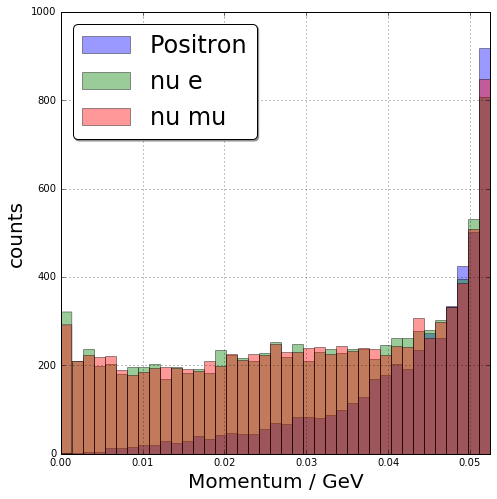

In [64]:
P1 = VALUES[:,0]
P2 = VALUES[:,1]
P3 = VALUES[:,2]
plt.figure(figsize=(7,7))
num =40
#plt.title(r'',fontsize=20)
plt.hist(P3,label='Positron',alpha=0.4,color='b',bins=np.linspace(0,105e-3/2,num))
plt.hist(P2,label='nu e',alpha=0.4,color='g',bins=np.linspace(0,105e-3/2,num))
plt.hist(P1,label='nu mu',alpha=0.4,color='r',bins=np.linspace(0,105e-3/2,num))

plt.xlabel('Momentum / GeV',fontsize=20)
plt.ylabel("counts",fontsize=20)

plt.xlim(0,105e-3/2)
#plt.ylim(0,300)
plt.legend(loc='upper left',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

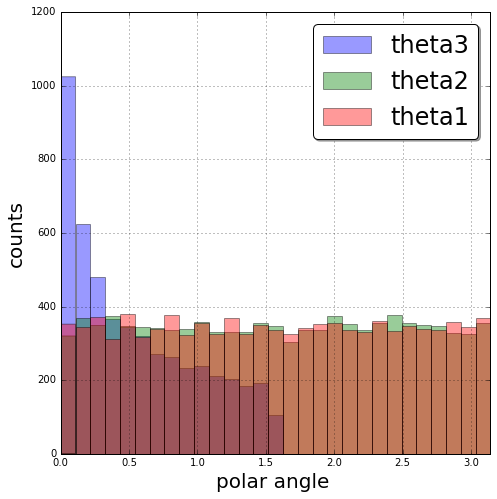

In [65]:
T1 = VALUES[:,3]
T2 = VALUES[:,4]
T3 = VALUES[:,5]
plt.figure(figsize=(7,7))
num =30
#plt.title(r'',fontsize=20)
plt.hist(T3,label='theta3',alpha=0.4,color='b',bins=np.linspace(0,pi,num))
plt.hist(T2,label='theta2',alpha=0.4,color='g',bins=np.linspace(0,pi,num))
plt.hist(T1,label='theta1',alpha=0.4,color='r',bins=np.linspace(0,pi,num))

plt.xlabel('polar angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,pi)
#plt.ylim(0,90)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

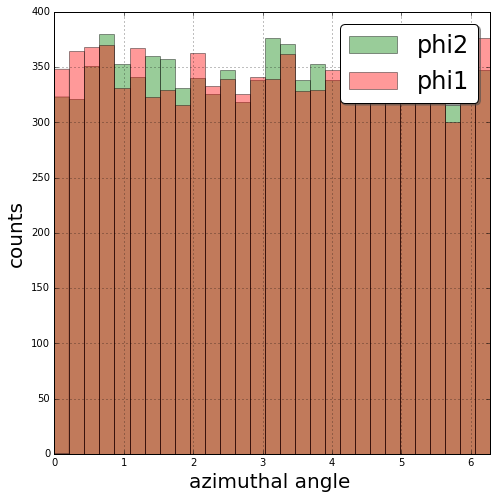

In [66]:
Phi1 = VALUES[0:,6]
Phi2 = VALUES[0:,7]
plt.figure(figsize=(7,7))
num =30
#plt.title(r'',fontsize=20)
plt.hist(Phi2,label='phi2',alpha=0.4,color='g',bins=np.linspace(0,2*pi,num))
plt.hist(Phi1,label='phi1',alpha=0.4,color='r',bins=np.linspace(0,2*pi,num))

plt.xlabel('azimuthal angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,2*pi)
#plt.ylim(0,90)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

In [15]:
def Spinnors(x,y):
    p1     = x[0]
    p2     = x[1]
    p3     = x[2]
    theta1 = x[3]
    theta2 = x[4]
    theta3 = x[5]
    phi1   = x[6]
    phi2   = x[7]
    phi3   = y[4]
    m0     = y[0]
    m1     = y[1]
    m2     = y[2]
    m3     = y[3]
    
    #T3simp = np.arcsin((p1*np.sin(theta1)*np.sin(phi1)+p2simp*np.sin(theta2)*np.sin(phi2))/p3simp)
    E1 = np.sqrt(p1**2 + m1**2)
    E2 = np.sqrt(p2**2 + m2**2)
    #E3simp = m0-p1-m1**2/(2*p1)-p2simp-m2**2/(2*p2simp)
    E3 = np.sqrt(p3**2 + m3**2)

    s1 =  np.sin(theta1/2)
    s2 =  np.sin(theta2/2)
    s3 =  np.sin(theta3/2)
    c1 =  np.cos(theta1/2)
    c2 =  np.cos(theta2/2)
    c3 =  np.cos(theta3/2)
    ei1 = np.exp(i*phi1)
    ei2 = np.exp(i*phi2)
    ei3 = np.exp(i*phi3)

    N1 = np.sqrt(E1+m1) #sqrt(p1**2+2*m1**2)
    N2 = np.sqrt(E2+m2)
    N3 = np.sqrt(E3+m3)
    con1 = p1/(m1+E1) # p1/(m1+sqrt(p1**2+m1**2))
    con2 = p2/(m2+E2)
    con3 = p3/(m3+E3)

    v0up = np.sqrt(2*m0)*np.mat([0,0,0,1])
    v0dn = np.sqrt(2*m0)*np.mat([0,0,1,0])   
    
    v1up = N1*np.mat([con1*s1,-con1*c1*ei1,-s1,c1*ei1])
    v1dn = N1*np.mat([con1*c1,con1*s1*ei1,c1,s1*ei1])

    v3up = N3*np.mat([con3*s3,-con3*c3*ei3,-s3,c3*ei3])
    v3dn = N3*np.mat([con3*c3,con3*s3*ei3,c3,s3*ei3])

    u2up = N2*np.mat([c2,s2*ei2,con2*c2,con2*s2*ei2])
    u2dn = N2*np.mat([-s2,c2*ei2,con2*s2,-con2*c2*ei2])


    dLIPS = 1/(64*(pi)**5*m0)*1/(E1*E2*E3)*p1**2*p2**2*p3**2*np.sin(theta1)*np.sin(theta2)
    
    return [v0up, v0dn, v1up, v1dn, u2up, u2dn, v3up, v3dn], [dLIPS]#,[p3simp,E3simp,C3simp,AA,A,BB,B,CC,C,con3,N3]

In [69]:
def integrand(x):
    P1 = x[0]
    P2 = x[1]
    P3 = x[2]
    T1 = x[3]
    T2 = x[4]
    T3 = x[5]
    Ph1 = x[6]
    Ph2 = x[7]
    masses   = [105e-3, 0.0, 0.0, 0, pi/2]
    Values   = [P1,P2,P3,T1,T2,T3,Ph1,Ph2]
    
    X ,Y= Spinnors(Values, masses)
    MSQRD = np.asarray(Msqrd(X))[0][0]
    DLIPS = np.asarray(Y)[0]
    VAL = MSQRD*DLIPS
    return VAL

In [70]:
domainsize = math.pow(math.pi,4)*4*(105e-3-511e-6)/2

length = len(VALUES)
total = 0.0
total_sq = 0.0
for x in range(0,length):
    FF = VALUES[x]
    f = integrand(FF)
    total += f
    total_sq += (f**2)
sample_mean = total/length
sample_var = (total_sq - ((total/length)**2)/length)/(length-1.0)
#sample_var = np.sqrt((total_sq - total**2)/(length-1))

In [71]:
sample_mean*domainsize

(2.8397422926287681e-21+0j)

In [56]:
sample_mean

(2.136046777931177e-14+0j)

In [38]:
TEST = []
length = len(VALUES)
total = 0.0
total_sq = 0.0
for x in range(0,length):
    FF = VALUES[x]
    f = integrand(FF)
    TEST.append(abs(f))
    #total += f
#sample_mean = total/length

(5.4902479344817896e-45, 2.2260222343202686e-21)

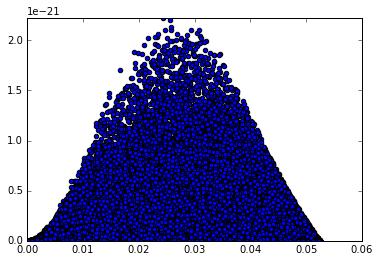

In [39]:
a=min(TEST)
b=max(TEST)
plt.scatter(VALUES[:,0],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(a,b)
#plt.ylim(1e-27,2e-21)

(5.4902479344817896e-45, 2.2260222343202686e-21)

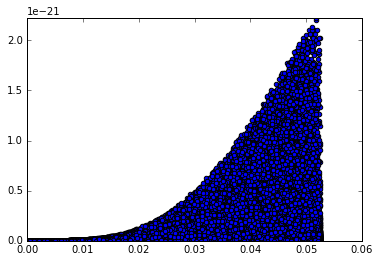

In [40]:
a=min(TEST)
b=max(TEST)
plt.scatter(VALUES[:,1],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(a,b)
#plt.ylim(1e-27,2e-21)

(1e-27, 2e-21)

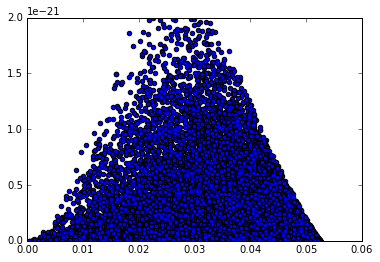

In [41]:
plt.scatter(VALUES[:,2],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(1e-27,2e-21)

In [28]:
m0 = 105e-3
t1 = VALUES[:,3]
t2 = VALUES[:,4]
phi1 =VALUES[:,6]
phi2 =VALUES[:,7]


B = (np.cos(t1)*np.cos(t2)+np.cos(phi1-phi2)*np.sin(t1)*np.sin(t2))

P3T = 105e-3- VALUES[:,0] - VALUES[:,1]

P3B = np.sqrt(VALUES[:,0]**2 - VALUES[:,1]**2 +2*VALUES[:,0]*VALUES[:,1]*B)


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


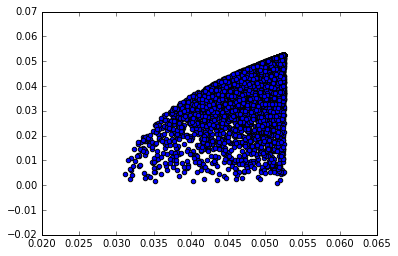

In [29]:
plt.scatter(P3T,P3B)

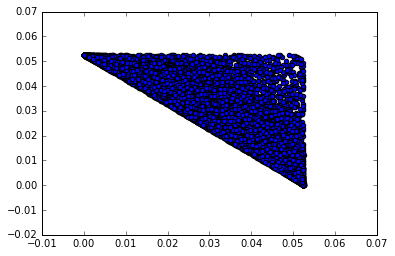

In [25]:
plt.scatter(VALUES[:,0],VALUES[:,1])

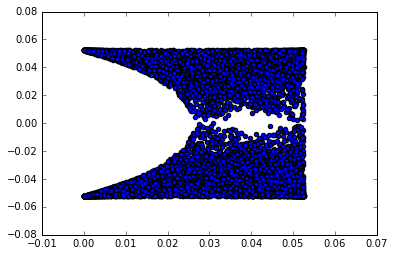

In [26]:
plt.scatter(VALUES[:,0],VALUES[:,2])

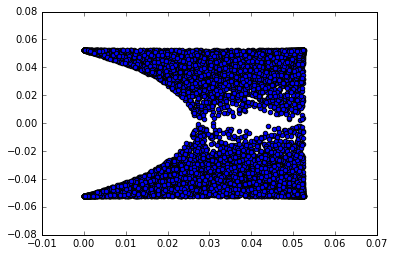

In [27]:
plt.scatter(VALUES[:,1],VALUES[:,2])

In [55]:
VALUES[:,3]

array([ 0.08413026,  0.56428464,  1.63212186, ...,  0.47203722,
        0.63146962,  0.54731331])

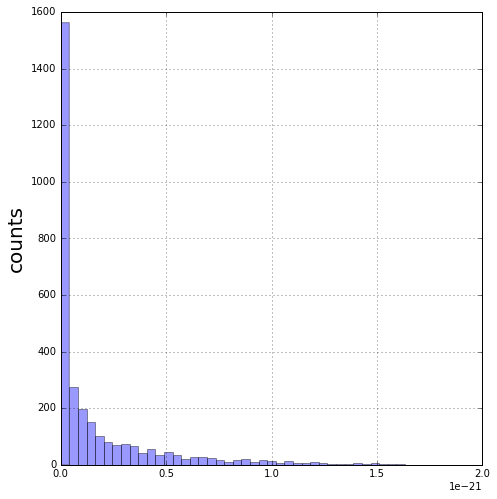

In [64]:
plt.figure(figsize=(7,7))
num =50
#plt.title(r'',fontsize=20)
plt.hist(TEST,alpha=0.4,color='b',bins=np.linspace(0,2e-21))

#plt.xlabel('azimuthal angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,2e-21)
#plt.ylim(0,90)
#plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

In [60]:
t1   = 0.5
t2   = 0.1
phi1 = 0.2
phi2 = 0.3

m0 = 105e-3

A = abs((np.sin(t1)*np.cos(phi1))/(np.sin(t2)*np.cos(phi2)))
B = (1-(np.cos(t1)*np.cos(t2)+np.cos(phi1-phi2)*np.sin(t1)*np.sin(t2)))

p1 = m0/2*((1+A)/(A*B))*(1-np.sqrt(1-((2*A*B)/(1+A)**2)))
p2 = p1*A

LL = (p1*np.sin(t1)*np.sin(phi1)+p2*np.sin(t2)*np.sin(phi2))
RR = (p1*np.cos(t1)+p2*np.cos(t2))

t3 = np.arctan(LL/RR)

p3 = (p1*np.cos(t1)+p2*np.cos(t2))/np.cos(t3)

print('p1 =',p1)
print('p2 =',p2)
print('p3 =',p3)
print('t3 =',t3)
print('A =',A)
print('B =',B)

p1 = 0.00890815895347
p2 = 0.0438866469977
p3 = 0.0515296326768
t3 = 0.0416046786917
A = 4.92656756878
B = 0.0791781200834
